In [25]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from efficientnet_pytorch import EfficientNet
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
import itertools

import numpy as np
import matplotlib.pyplot as plt
import shap

In [26]:
from torch.utils.data import random_split


# Define a list of data augmentation transformations to apply
augmentations = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(45),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
]

# Define the transform for the data
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    # transforms.RandomApply(augmentations, p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# transform_train = transforms.Compose([
#     # transforms.Resize(256),
#     # transforms.CenterCrop(224),
#     transforms.RandomApply(augmentations, p=0.5),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# transform_test = transforms.Compose([
#     # transforms.Resize(256),
#     # transforms.CenterCrop(224),
#     # transforms.RandomApply(augmentations, p=0.5),
#     transforms.ToTensor(),
#     # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])



# Load the dataset
dataset = torchvision.datasets.ImageFolder(root='E:/Downloads/grad/111_1/data science instroduction/final_project/Pineapple_image', transform=transform)

# Get the labels for each sample in the dataset
labels = [label for _, label in dataset] # 0~8

# Create the stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

# Split the dataset into train and test sets
for train_index, test_index in sss.split(dataset, labels):
    train_set = torch.utils.data.Subset(dataset, train_index)
    test_set = torch.utils.data.Subset(dataset, test_index)

# train_set = TransformedSubset(train_set,transform_train)
# test_set = TransformedSubset(test_set,transform_test)
train_set, test_set = random_split(dataset, [1400, 400])

# Create the dataloaders
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

classes = ('stage_501', 'stage_505', 'stage_509', 'stage_601',
           'stage_605', 'stage_609', 'stage_701', 'stage_705', 'stage_709')

model = EfficientNet.from_pretrained('efficientnet-b0')


Loaded pretrained weights for efficientnet-b0


In [27]:
# # Define a list of data augmentation transformations to apply
# augmentations = [
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(),
#     transforms.RandomRotation(45),
#     transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
# ]

# # Define the transform for the data
# transform_test = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     # transforms.RandomApply(augmentations, p=0.5),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# transform_train = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.RandomApply(augmentations, p=0.5),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Load the dataset
# dataset_test = torchvision.datasets.ImageFolder(root='E:/Downloads/grad/111_1/data science instroduction/final_project/Pineapple_image', transform=transform_test)

# dataset_train = torchvision.datasets.ImageFolder(root='E:/Downloads/grad/111_1/data science instroduction/final_project/Pineapple_image', transform=transform_train)

# # Check that aug_idx and no_aug_idx are not overlapping
# # aug_idx = torch.arange(1, len(dataset_test), 2)
# # no_aug_idx = torch.arange(0, len(dataset_test), 2)
# test_idx = []
# train_idx = []
# for i in range(len(dataset_test)):
#     if (i%5==0): test_idx.append(i)
#     else: train_idx.append(i)
# train_sub = torch.utils.data.Subset(dataset_train, train_idx)
# test_sub = torch.utils.data.Subset(dataset_test, test_idx)
# # Get the labels for each sample in the dataset
# # labels = [label for _, label in dataset_test] # 0~8

# # Create the stratified shuffle split object
# # sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# # Split the dataset into train and test sets
# # for train_index, test_index in sss.split(dataset_test, labels):
# #     train_set = torch.utils.data.Subset(dataset_test, train_index)
# #     test_set = torch.utils.data.Subset(dataset_test, test_index)

# # Create the dataloaders
# trainloader = torch.utils.data.DataLoader(train_sub, batch_size=64, shuffle=True)
# testloader = torch.utils.data.DataLoader(test_sub, batch_size=64, shuffle=False)

# classes = ('stage_501', 'stage_505', 'stage_509', 'stage_601',
#            'stage_605', 'stage_609', 'stage_701', 'stage_705', 'stage_709')

# model = EfficientNet.from_pretrained('efficientnet-b0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


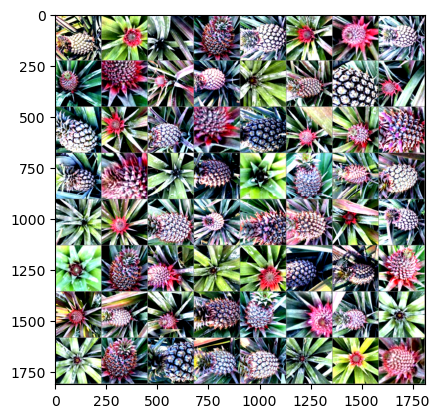

stage_705 stage_505 stage_501 stage_609 stage_705 stage_505 stage_601 stage_705 stage_605


In [28]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(9)))

In [29]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)


In [30]:
def train(model, dataloader, criterion, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
    return total_loss / len(dataloader), correct / len(dataloader.dataset)

def evaluate(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    y_true = []
    y_pred = []
    losses = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())
            losses.append(loss.item())

    acc = correct / len(dataloader.dataset)
    cm = confusion_matrix(y_true, y_pred)
    return total_loss / len(dataloader), acc, cm, losses

In [31]:
# patience = 3
# num_epochs = 20
# best_val_loss = float('inf')
# epochs_without_improvement = 0
# acc_test_curve = []
# losses_test_curve = []

# for epoch in range(num_epochs):
#     train_loss, train_acc = train(model, trainloader, criterion, optimizer)
#     val_loss, val_acc, cm, losses = evaluate(model, testloader, criterion)
#     print('Epoch {}: train loss = {}, train acc = {}, val loss = {}, val acc = {}'.format(
#         epoch+1, train_loss, train_acc, val_loss, val_acc))
#     losses_test_curve.append(losses)
#     acc_test_curve.append(val_acc)
#     # Check if the validation loss has improved
#     if val_loss < best_val_loss:
#         # Update the best validation loss
#         best_val_loss = val_loss
        
#         # Reset the counter for the number of epochs without improvement
#         epochs_without_improvement = 0
#     else:
#         # Increment the counter for the number of epochs without improvement
#         epochs_without_improvement += 1
        
#         # Check if the number of epochs without improvement has reached the patience threshold
#         if epochs_without_improvement >= patience:
#             # Stop the training loop
#             print('Early stopping at epoch {}'.format(epoch+1))
#             break

In [32]:
# def flatten(input):
#     new_list = []
#     for i in input:
#         for j in i:
#             new_list.append(j)
#     return new_list

In [33]:
# losses_curve = flatten(losses_test_curve)

In [34]:
# plt.title("Loss Curve")
# plt.plot(losses_curve, label="Test Loss Curve")
# plt.xlabel("Iterarion")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

In [35]:
# plt.plot(acc_test_curve, label="Test")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

In [36]:
# cm

In [37]:
# PATH = 'D:/PycharmProjects/pipeapple_classification_task/efficient_net_b0_devide_argu/efficient_netb0.pth'
# torch.save(model.state_dict(), PATH)

In [38]:
# Create an efficientnet_b3 model
model = EfficientNet.from_name('efficientnet-b0')
model.load_state_dict(torch.load('D:/PycharmProjects/pipeapple_classification_task/efficient_netb0_AdamW_0.001_line_ver2/weight.pth'))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


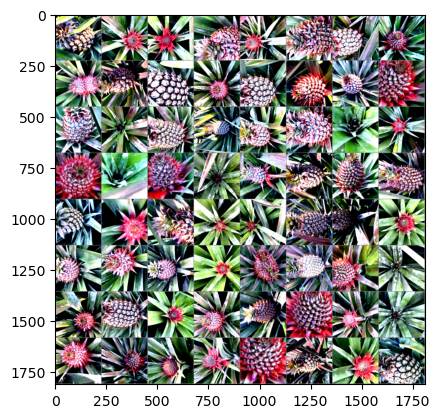

GroundTruth:  stage_709 stage_505 stage_505 stage_609 stage_509 stage_609 stage_705 stage_605 stage_605


In [39]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(9)))

In [40]:
outputs = model(images)

In [41]:
val_loss, val_acc, cm, losses = evaluate(model, testloader, criterion)

In [42]:
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

In [43]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(0)))

Predicted:  


In [44]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %') #95.83333333333333 

Accuracy of the network on the 10000 test images: 98.0 %


In [45]:
# # prepare to count predictions for each class
# correct_pred = {classname: 0 for classname in classes}
# total_pred = {classname: 0 for classname in classes}

# # again no gradients needed
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = model(images)
#         _, predictions = torch.max(outputs, 1)
#         # collect the correct predictions for each class
#         for label, prediction in zip(labels, predictions):
#             if label == prediction:
#                 correct_pred[classes[label]] += 1
#             total_pred[classes[label]] += 1


# # print accuracy for each class
# for classname, correct_count in correct_pred.items():
#     accuracy = 100 * float(correct_count) / total_pred[classname]
#     print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [46]:
# resize and take the center part of image to what our model expects
def get_input_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])       
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])    

    return transf

def get_input_tensors(img):
    transf = get_input_transform()
    # unsqeeze converts single image to batch of 1
    return transf(img).unsqueeze(0)

def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])    

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])    

    return transf    



In [47]:
import io
from PIL import Image
import torch.nn.functional as F
from lime import lime_image
from skimage.segmentation import mark_boundaries

def process_lime(path):
    with open(path, 'rb') as f:
        image_data = f.read()
    f = io.BytesIO(image_data)
    img = Image.open(f)
    img_t = get_input_tensors(img)
    model.eval()
    logits = model(img_t)
    classes_list = ['stage_501', 'stage_505', 'stage_509', 'stage_601',
           'stage_605', 'stage_609', 'stage_701', 'stage_705', 'stage_709']
    probs = F.softmax(logits, dim=1)
    probs5 = probs.topk(1)
    tuple((p,c, classes_list[c]) for p, c in zip(probs5[0][0].detach().numpy(), probs5[1][0].detach().numpy()))
    print(probs5)
    pill_transf = get_pil_transform()
    preprocess_transform = get_preprocess_transform()
    def batch_predict(images):
        model.eval()
        batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        batch = batch.to(device)
        
        logits = model(batch)
        probs = F.softmax(logits, dim=1)
        return probs.detach().cpu().numpy()
    test_pred = batch_predict([pill_transf(img)])
    test_pred.squeeze().argmax()
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(np.array(pill_transf(img)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000) # number of images that will be sent to classification function
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    img_boundry1 = mark_boundaries(temp/255.0, mask)
    plt.imshow(img_boundry1)

torch.return_types.topk(
values=tensor([[1.0000]], grad_fn=<TopkBackward0>),
indices=tensor([[0]]))


100%|██████████| 1000/1000 [00:05<00:00, 199.60it/s]


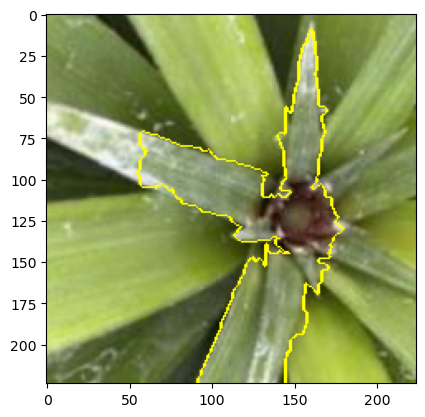

In [48]:
process_lime('E:/Downloads/grad/111_1/data science instroduction/final_project/Pineapple_image/stage_501/IMG_4386.JPG')